In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

In [97]:
i=1
g_velocity = 100;
g_acceleration = 100;
for filename in os.listdir("D:\FYP_ML\S3"):
    if i==811:
        break
    df2 = pd.read_csv("D:\FYP_ML\S3" + "\\"+ filename)
    df2['Velocity']= 0
    df2['Position_sum']= 0
    df2['Velocity_sum']= 0
    df2['Stiffness']= df2['Impedence']
    df2['Acceleration']= 0
    for k in range(1,len(df2)):
        df2['Position_sum'][k]= df2['Position_sum'][k-1]+df2['Velocity'][k-1]*(df2['Timestamp'][k]-df2['Timestamp'][k-1])
        df2['Velocity'][k]= g_velocity*(df2['Position'][k]-df2['Position_sum'][k])
        df2['Velocity_sum'][k]= df2['Velocity_sum'][k-1]+df2['Acceleration'][k-1]*(df2['Timestamp'][k]-df2['Timestamp'][k-1])
        df2['Acceleration'][k]= g_acceleration*(df2['Velocity'][k]-df2['Velocity_sum'][k])
    df2['F*x area'] = df2['Reaction Force']*df2['Position']
    df2 = df2.drop('Impedence',axis=1)
    df2 = df2.drop('Position_sum',axis=1)
    df2 = df2.drop('Velocity_sum',axis=1)
    df2 = df2.drop('Apllied Force',axis=1)
    df2 = df2.drop('Timestamp',axis=1)
    df2.to_csv("D:\FYP_ML\Processed Data\S3\S3_" + str(i) +".csv",index=False)
    i=i+1

In [93]:
df2

,Position,Reaction Force,Velocity,Stiffness,Acceleration,F*x area
0,0.000029,0.052305,0.000000,-26312.355307,0.000000,1.512282e-06
1,0.000029,0.050979,0.002891,-26279.210486,0.289128,1.473943e-06
2,0.000029,0.049715,0.002882,-26247.591568,0.287278,1.437397e-06
3,0.000029,0.048432,0.002873,-26215.508089,0.285379,1.400302e-06
4,0.000029,0.047170,0.002863,-26183.951925,0.283489,1.363814e-06
...,...,...,...,...,...,...
29995,0.000024,-0.020274,0.000734,-21775.342407,0.023079,-4.848123e-07
29996,0.000024,-0.019678,0.000731,-21788.598176,0.022722,-4.705602e-07
29997,0.000024,-0.019155,0.000729,-21800.209830,0.022406,-4.580538e-07
29998,0.000024,-0.018657,0.000727,-21811.285629,0.022101,-4.461452e-07


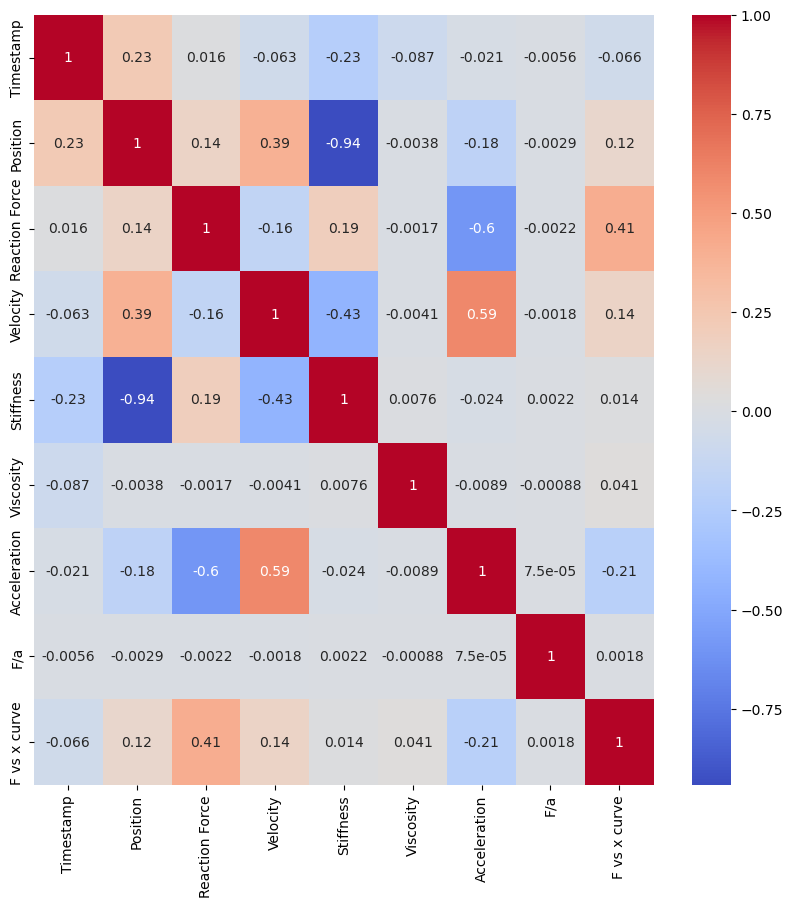

In [72]:
import seaborn as sns

plt.figure(figsize=(10, 10))  
# Calculate the Pearson correlation matrix
corr_matrix = df2.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()